# **Data Mining - Class Assignment W09 Hierarchical Clustering**

### M. Ilham Fadhilah Wirayudha - 0706022310062

<br>

### **Part A – Data Preprocessing**

In [620]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [621]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [622]:
# Check for missing value
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing[missing > 0])

if missing.sum() > 0:
    display(df[df.isnull().any(axis=1)].head())
else:
    print("Tidak ada missing values")

Missing values per column:
Series([], dtype: int64)
Tidak ada missing values


In [623]:
# Check for unique values
for col in df.columns:
    unique_vals = df[col].nunique()
    sample_vals = df[col].unique()[:10]
    print(f"{col}  |  unique: {unique_vals}  |  sample: {sample_vals}")

Area Category  |  unique: 4  |  sample: ['Standard' 'Below Standard' 'Sangat Premium' 'Premium']
Nama Daerah  |  unique: 126  |  sample: ['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan']
Luas Tanah (m2)  |  unique: 141  |  sample: [240  30 170 187 350 450  96  85  72  50]
Luas Bangunan (m2)  |  unique: 125  |  sample: [300  60 170 250 600 530 100 120  72  90]
Jumlah Kamar  |  unique: 10  |  sample: [ 4  2  5  3  6  8  7  1 13  9]
Jumlah Kamar Mandi  |  unique: 9  |  sample: [ 3  1  4  5  6  2  7  8 13]
Tingkat/Lantai   |  unique: 4  |  sample: [2 1 3 4]
Harga Penawaran (dari Owner)  |  unique: 171  |  sample: [ 3500000000   287799000  2699999999  3100000000  5000000000 10800000000
   390000000   725000000   775000000   850000000]
Terjual/Belum  |  unique: 1  |  sample: ['Belum']
Arah Hadap Rumah  |  unique: 4  |  sample: ['Utara' 'Selatan' 'Barat' 'Timur']
Posisi Rumah  |  unique: 5  |  sample: ['S

In [624]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", 
                        "Luas Bangunan (m2)": "Luas Bangunan", 
                        "Harga Penawaran (dari Owner)" : "Harga Penawaran Owner",
                        "Lebar Jalan Depan Rumah (ROW)" : "Lebar Jalan Depan Rumah",
                        "Tingkat/Lantai ": "Tingkat atau Lantai",
                        })
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat atau Lantai,Harga Penawaran Owner,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [625]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat atau Lantai,Harga Penawaran Owner
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [626]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat atau Lantai      308 non-null    int64 
 7   Harga Penawaran Owner    308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


<br>

### **Part B – Exploratory Data Analysis**

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_5020\404869594.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




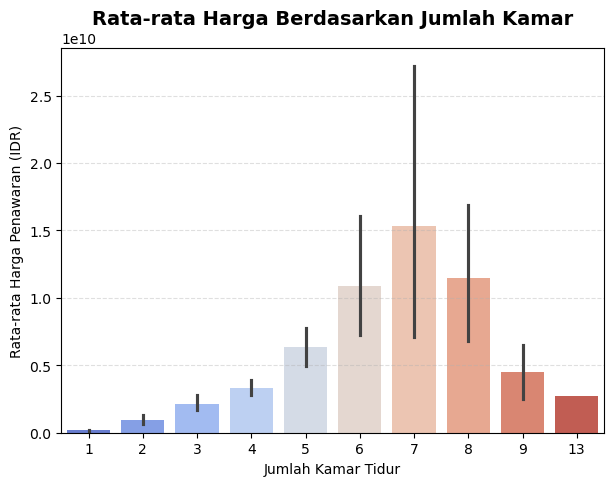

In [627]:
# Visualisasi Rata-rata harga berdasarkan jumlah kamar
plt.figure(figsize=(7,5))
sns.barplot(x="Jumlah Kamar", y="Harga Penawaran Owner", data=df, estimator='mean', palette="coolwarm")
plt.title("Rata-rata Harga Berdasarkan Jumlah Kamar", fontsize=14, weight="bold")
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("Rata-rata Harga Penawaran (IDR)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

# Semakin banyak jumlah kamar tidur, harga properti cenderung meningkat karena ukuran dan fasilitas rumah yang lebih besar. 
# Penurunan pada kamar di atas 8 kemungkinan terjadi karena jumlah sampel sedikit atau lokasi yang kurang premium.

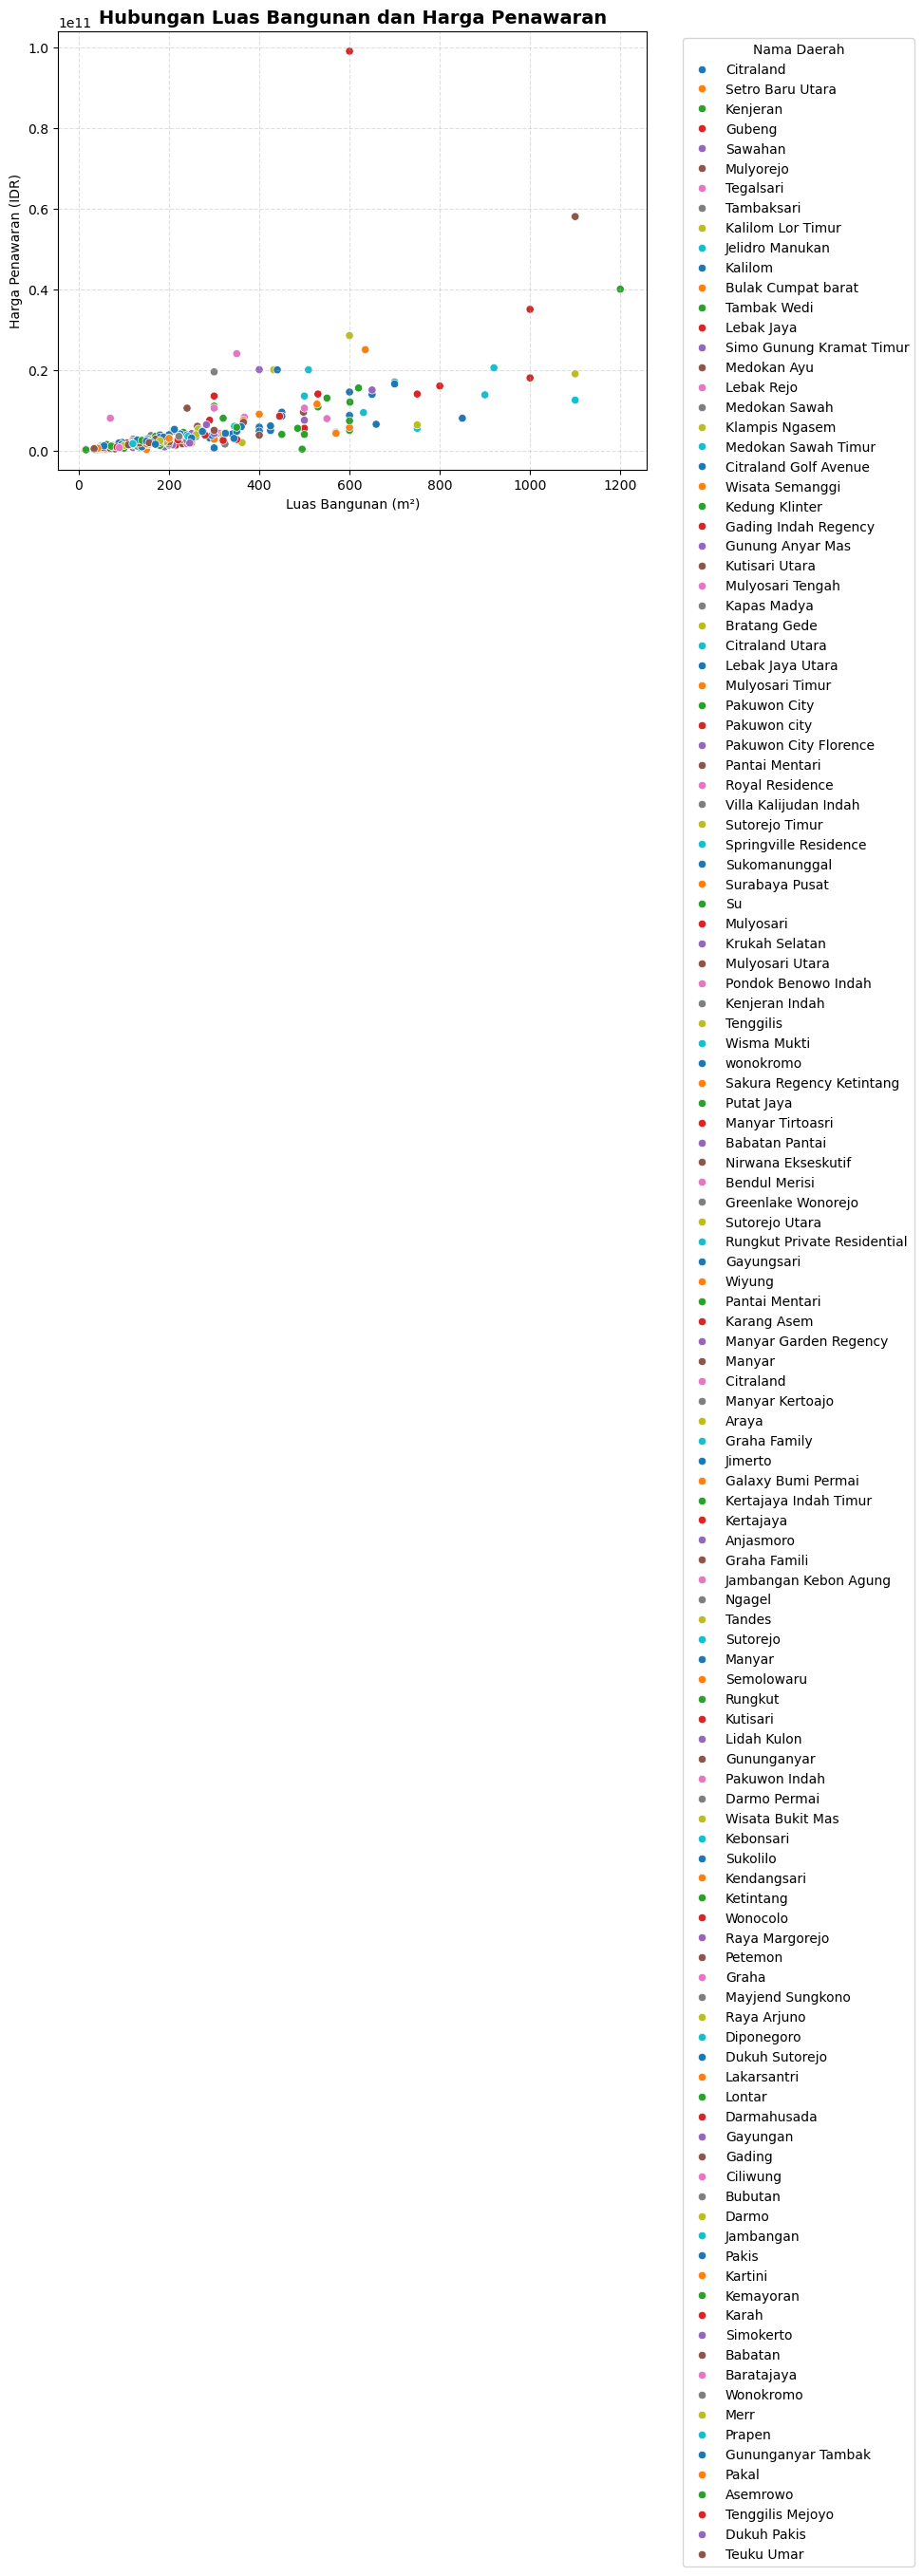

In [628]:
# Visualisasi Hubungan Luas Bangunan dan Harga Penawaran
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Luas Bangunan", y="Harga Penawaran Owner", hue="Nama Daerah", palette="tab10")
plt.title("Hubungan Luas Bangunan dan Harga Penawaran", fontsize=14, weight="bold")
plt.xlabel("Luas Bangunan (m²)")
plt.ylabel("Harga Penawaran (IDR)")
plt.legend(title="Nama Daerah", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# Grafik menunjukkan tren positif antara luas bangunan dan harga penawaran semakin besar luas bangunan, 
# harga properti cenderung meningkat. Namun, terdapat beberapa outlier dengan harga tinggi pada bangunan berukuran sedang, 
# kemungkinan karena faktor lokasi premium atau fasilitas tambahan.

<br>

### **Part C – Data Preparation for Clustering**

In [629]:
df_encoded = df.copy()

# Kolom kategorikal yang perlu di-encode
categorical_cols = [
    "Area Category",
    "Nama Daerah",
    "Terjual/Belum",
    "Arah Hadap Rumah",
    "Posisi Rumah",
    "Lebar Jalan Depan Rumah"
]

# Label encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat atau Lantai,Harga Penawaran Owner,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,0,3,2,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0


In [630]:
sc = StandardScaler()

# Pilih kolom numerik yang relevan untuk clustering
cols_to_scale = [
    'Luas Tanah',
    'Luas Bangunan',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat atau Lantai',
    'Harga Penawaran Owner'
]

# Fit dan transform kolom tersebut
df_scaled = sc.fit_transform(df[cols_to_scale])

# Ubah hasil scaling menjadi DataFrame lagi
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_scale)

df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat atau Lantai,Harga Penawaran Owner
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [631]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat atau Lantai,Harga Penawaran Owner
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


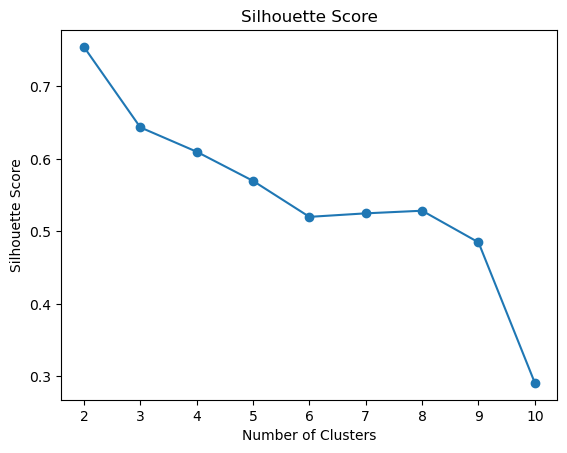

In [632]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


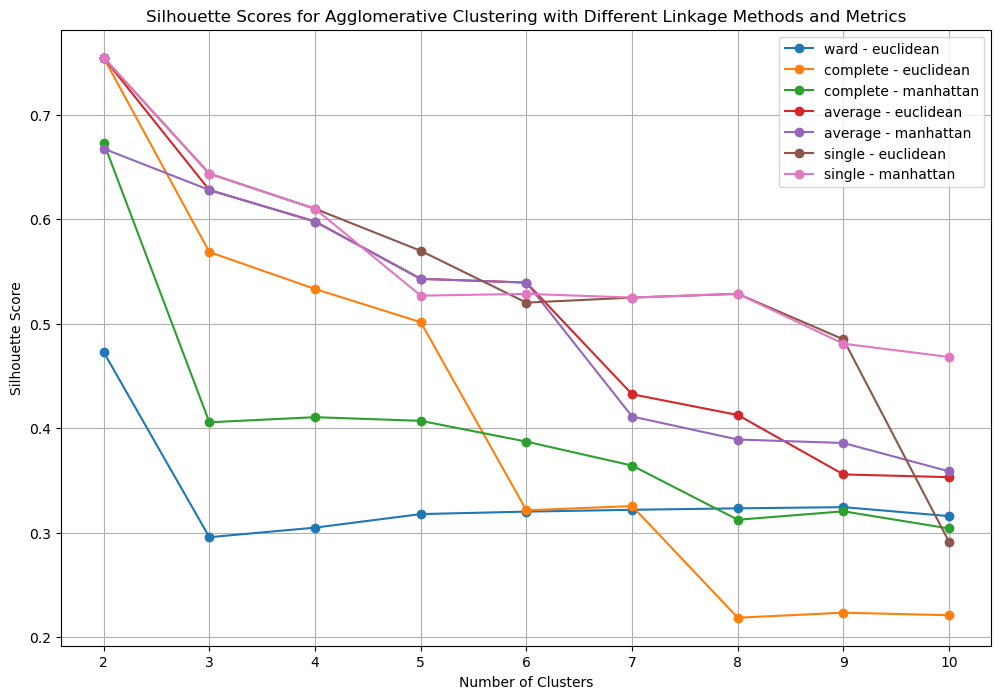

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [633]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# berdasarkan analisis silhouette score, kombinasi terbaik ditemukan dengan 2 cluster, 
# menggunakan complete linkage dan Euclidean distance. Nilai silhouette score sebesar 0.754 
# menunjukkan pemisahan cluster yang sangat baik, menandakan adanya dua segmen pasar properti yang jelas 
# terbedakan berdasarkan karakteristik seperti harga, ukuran, dan lokasi.

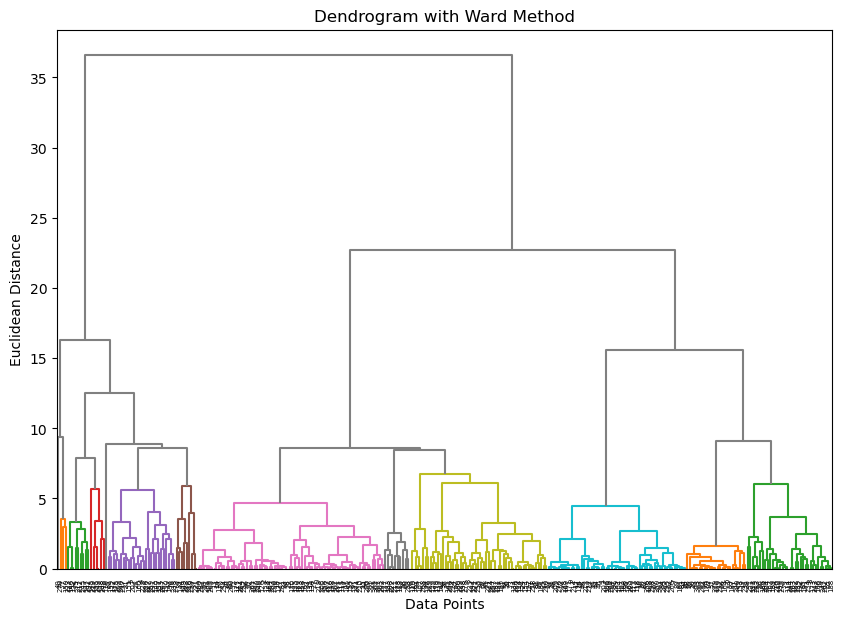

In [634]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

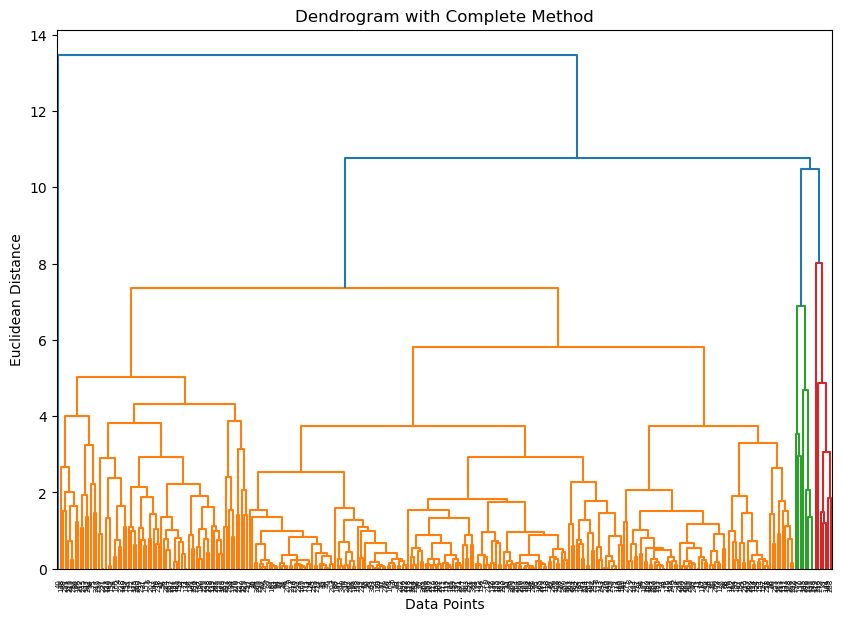

In [635]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

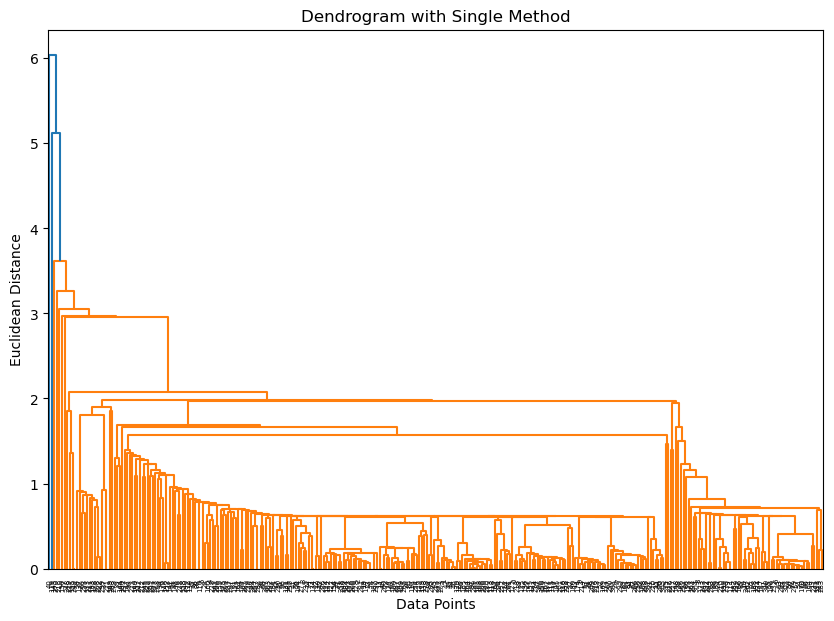

In [636]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

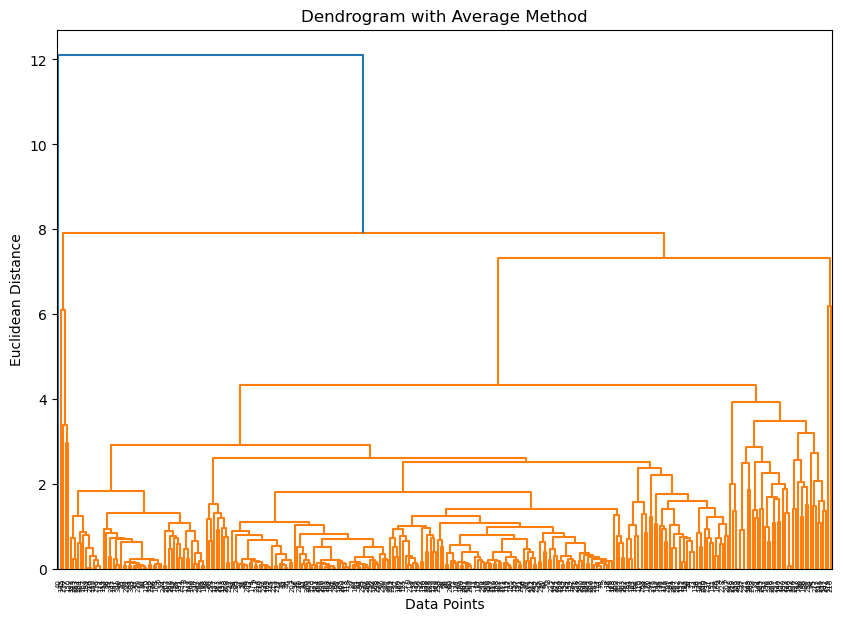

In [637]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

<br>

### **Part D – Hierarchical Clustering Modeling**

### Hierarchical Clustering Model

In [638]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [639]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


In [640]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc = agglo.fit_predict(df_scaled)

In [641]:
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.4727464054343294


### Dendogram Visualization for Hierarchical Clustering Model

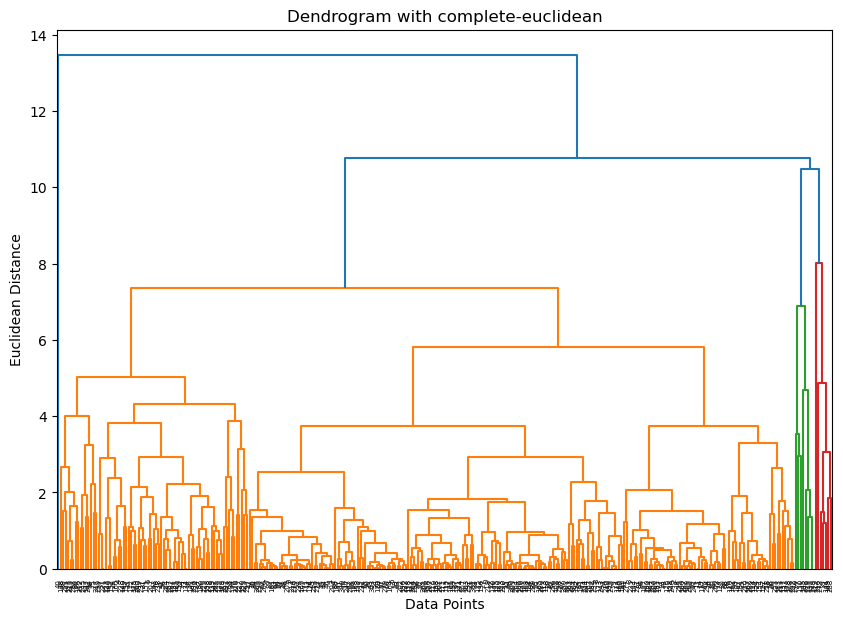

In [642]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Merge with the original data

In [643]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat atau Lantai,Harga Penawaran Owner,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil,1


<br>

### **Part E – Comparison & Interpretation**

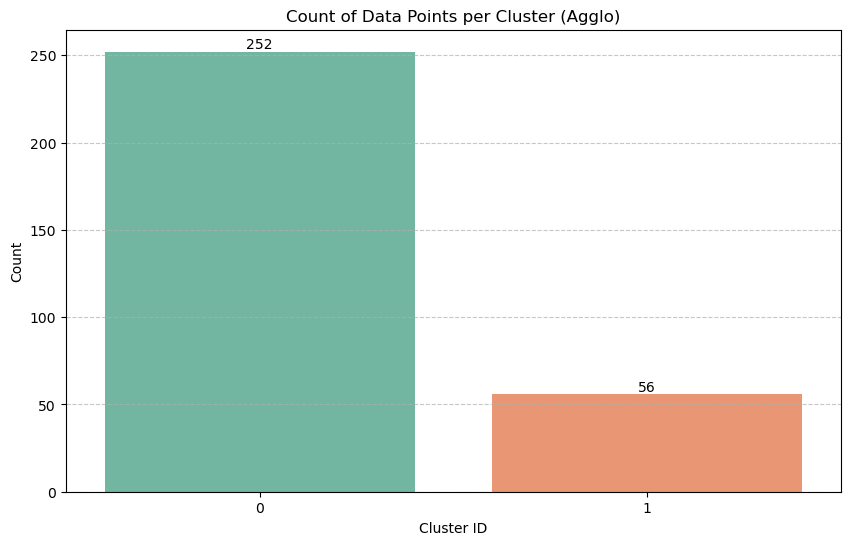

In [644]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

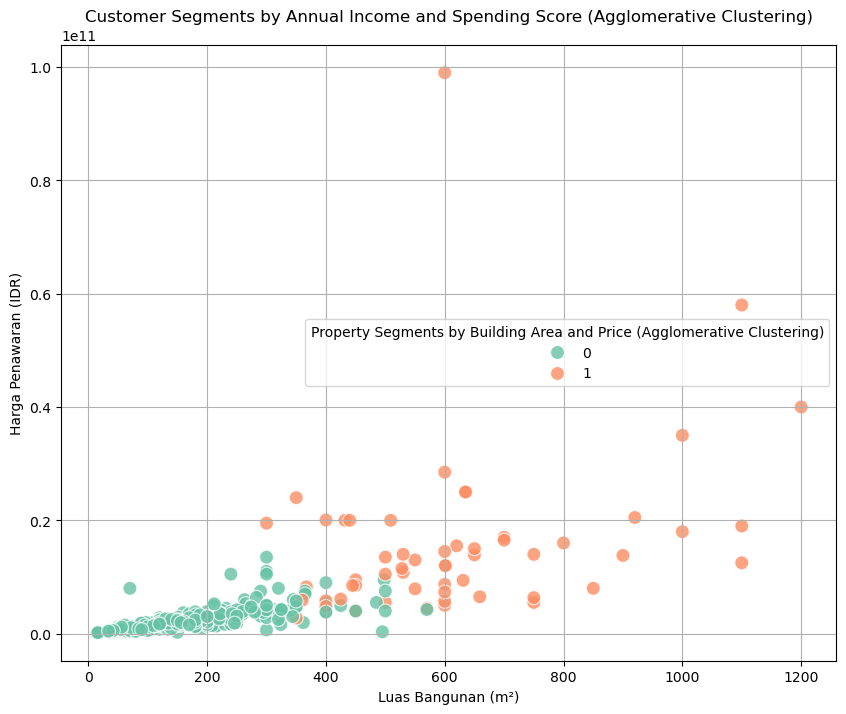

In [645]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Bangunan', y='Harga Penawaran Owner', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score (Agglomerative Clustering)')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.legend(title='Property Segments by Building Area and Price (Agglomerative Clustering)')
plt.grid(True)
plt.show()

In [646]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran Owner'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Cluster (Complete Linkage)')

fig.show()

### Statistical Summary for each cluster

In [647]:
# Group the data by cluster and calculate the mean size and price for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Area Category': ['first', 'count'],
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran Owner': ['mean', 'std', 'min', 'max', 'size'],
})

# Rename the <lambda> column in the Area Category MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename the cluster axis
cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Area Category        Luas Tanah                        Luas Bangunan  \
                 mode count        mean         std  min   max          mean   
cluster                                                                        
0            Standard   252  155.857143   93.265992   14   525    187.904762   
1             Premium    56  546.875000  245.541632  240  1561    621.214286   

                               Jumlah Kamar                    \
                std  min   max         mean       std min max   
cluster                                                         
0        106.842173   14   570     3.853175  1.341295   1   9   
1        212.411240  300  1200     6.178571  1.538679   3  13   

        Harga Penawaran Owner                                              
                         mean           std         min          max size  
cluster                                                                    
0                2.628531e+09  2.046885e+09   160000000  13500000000  252  
1                1.575027e+10  1.493437e+10  2750000000  99000000000   56

<br>

### Managerial Implications

**Cluster 0 Affordable & Compact Property Segment**

Cluster Profile Properti dalam Cluster 0 umumnya memiliki:
- Luas tanah dan bangunan yang relatif kecil
- Jumlah kamar yang terbatas (2–3 kamar)
- Harga penawaran yang lebih rendah dibanding rata-rata pasar
- Berlokasi di area pinggiran atau berkembang, dengan akses jalan standar

Managerial Interpretation:
- Cluster ini merepresentasikan segmen pasar menengah ke bawah atau pembeli rumah pertama.
Properti di kelompok ini menunjukkan permintaan tinggi terhadap hunian terjangkau, fungsional, dan efisien.

Business Implications:
- Pricing & Sales Strategy: Developer dapat menerapkan strategi affordable pricing dengan menonjolkan kemudahan cicilan, DP ringan, atau subsidi KPR.
- Product Design: Fokus pada unit rumah kompak (tipe 36–72) dengan efisiensi ruang, tanpa banyak fitur premium.
- Marketing Focus: Gunakan promosi digital melalui marketplace properti dan media sosial, menargetkan keluarga muda atau pembeli baru.
- Location Development: Cocok dikembangkan di daerah berkembang dengan harga lahan yang masih terjangkau, serta akses transportasi publik yang baik.

**Cluster 1 Premium & Spacious Property Segment**

Cluster Profile Properti dalam Cluster 1 cenderung memiliki:
- Luas tanah dan bangunan yang besar
- Jumlah kamar lebih banyak (≥4 kamar)
- Harga penawaran tinggi
- Sering berlokasi di area strategis atau perumahan elit, dengan lebar jalan depan rumah yang lebih besar

Managerial Interpretation:
- Cluster ini menggambarkan segmen pasar menengah ke atas yang mencari properti dengan kenyamanan, prestise, dan fasilitas lengkap.
Pembeli dalam segmen ini tidak terlalu sensitif terhadap harga, melainkan fokus pada lokasi dan kualitas bangunan.

Business Implications:
- Pricing & Marketing Strategy: Gunakan value-based pricing dengan menonjolkan kualitas material, desain arsitektur, dan lingkungan eksklusif.
- Product Development: Fokus pada properti berdesain luas dan modern, dengan fasilitas tambahan seperti garasi ganda, taman pribadi, dan keamanan 24 jam.
- Sales Approach: Terapkan pendekatan personalized marketing, seperti open house privat, kerja sama dengan agen properti premium, dan promosi di media bisnis.
- Investment Insight: Segmen ini berpotensi menarik bagi investor properti karena nilai jual kembali tinggi dan lokasi yang strategis.